# Transform MMHS150K dataset from JSON to CSV

This is just a helper script to transform MMHS150K dataset

In [1]:
import pandas as pd
from tqdm import tqdm

import json
import csv
import os
from pprint import pprint
from collections import Counter

In [2]:
BASE_PATH = "/hdd/matjazibb/dataset/MMHS150K"

In [3]:
def majority_label(labels):
    labels = list(map(lambda x: 0 if x == 0 else 1, labels))
    label = sorted(Counter(labels).items(), key=lambda x: x[1], reverse=True)[0][0]
    return "NOT" if label == 0 else "OFF"

def get_image_text(id):
    path = f"{BASE_PATH}/img_txt/{id}.json"
    if not os.path.isfile(path): return ""

    with open(path, "r") as json_file:
        return json.load(json_file)["img_text"]

In [4]:
data = []
with open(f"{BASE_PATH}/MMHS150K_GT.json", "r") as json_file:
    json_data = json.load(json_file)
    for id, tweet_data in tqdm(json_data.items()):
        data += [[
            id,
            tweet_data["tweet_text"],
            get_image_text(id),
            majority_label(tweet_data["labels"])
        ]]

100%|██████████| 149823/149823 [00:04<00:00, 36991.34it/s]


In [5]:
data_df = pd.DataFrame(data, columns=["id", "tweet", "tweet_img_text", "label"])

In [6]:
data_df.head(30)

,id,tweet,tweet_img_text,label
0,1114679353714016256,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,#YOUNGERU SAVE IT,OFF
1,1063020048816660480,My horses are retarded https://t.co/HYhqc6d5WN,,OFF
2,1108927368075374593,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,,NOT
3,1114558534635618305,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,,NOT
4,1035252480215592966,“EVERYbody calling you Nigger now!” https://t....,,OFF
5,1106978219654303744,“ real ass bitch give a fuck boutta nigga” htt...,,NOT
6,1113920043568463874,@WhiteHouse @realDonaldTrump Fuck ice. White s...,"Hello, White Nationalist. Good-bye. Others wil...",OFF
7,1114588617693966336,Day’s a cunt https://t.co/Ie6QZReHsw,Dad's a Cunt Mum's a Cunt Nan's a Cunt Kids ar...,NOT
8,1045809514740666370,#sissy faggot https://t.co/bm1nk8HcYO,EVERY SISSY GIRL SHOULD KNOW THAT MEN ARE WIZA...,OFF
9,1108178453910695936,@Gloriko_ Nigga what? https://t.co/nOwIJtgtU1,,OFF


<AxesSubplot:title={'center':'Class distirbution: MMHS150K'}>

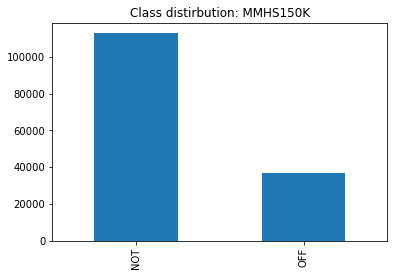

In [7]:
data_df["label"].value_counts().plot(kind="bar", title=f"Class distirbution: MMHS150K")

In [8]:
data_df.to_csv("data/non-processed/dataset12/MMHS150K.csv", index=False, quoting=csv.QUOTE_ALL)

In [9]:
%reset